In [1]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.0
2.4.0


In [2]:
# データセットダウンロード
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
# データ確認
print(X_train_full.shape)
print(X_train_full.dtype)

(60000, 28, 28)
uint8


In [4]:
# 0~1の範囲にスケーリング
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [5]:
# ラベル
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle bot"]

In [6]:
class_names[y_train[0]]

'Coat'

In [7]:
# モデル作成
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))   # 1次元配列に変換
model.add(keras.layers.Dense(300, activation="relu"))   # keras.activation.relu
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# model = keras.models.Sequential([
#     keras.layers.Flatten(input_shape=[28, 28])   # 1次元配列に変換
#     keras.layers.Dense(300, activation="relu")   # keras.activation.relu
#     keras.layers.Dense(100, activation="relu")
#     keras.layers.Dense(10, activation="softmax")
# ])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.layers

In [10]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [11]:
# 層の全てのパラメータを読み書きする。
weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[[-0.01246455  0.0701663   0.01576652 ...  0.05867629 -0.00465037
   0.0077211 ]
 [-0.00268095  0.05906332  0.01553418 ...  0.06577508 -0.01060832
   0.06362797]
 [ 0.00211265 -0.07275133 -0.07352142 ... -0.01859243  0.05899827
  -0.02399479]
 ...
 [-0.02431828  0.03040983 -0.00438704 ...  0.05784927 -0.06552406
   0.02001029]
 [-0.07099399  0.05416764  0.04382569 ... -0.0190195  -0.04534578
   0.02690355]
 [-0.03433828 -0.05264656 -0.00031827 ...  0.07231808 -0.01188633
   0.02193234]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0

In [12]:
# コンパイル
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",   # デフォルトでlr=0.01
    metrics=["accuracy"]
)

In [13]:
# 学習
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.9945 - accuracy: 0.6767 - val_loss: 0.5056 - val_accuracy: 0.8282
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.5040 - accuracy: 0.8260 - val_loss: 0.4644 - val_accuracy: 0.8384
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4522 - accuracy: 0.8413 - val_loss: 0.4122 - val_accuracy: 0.8552
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4232 - accuracy: 0.8506 - val_loss: 0.4129 - val_accuracy: 0.8542
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3989 - accuracy: 0.8604 - val_loss: 0.4087 - val_accuracy: 0.8564
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3718 - accuracy: 0.8697 - val_loss: 0.3752 - val_accuracy: 0.8718
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3687 - accuracy: 0.8680 - val_loss: 0.3594 - val_accuracy:

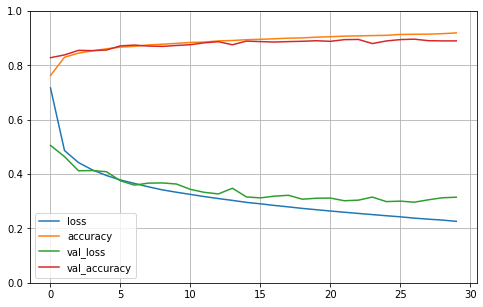

In [14]:
# plot
# 検証誤差は各エポックの最後に計算されるに対し、訓練誤差は各エポックの途中で移動平均を使って計算される。
# = 訓練セットの曲線は半エポック分左にずらしてみる。
import pandas as pd 
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid()
plt.gca().set_ylim(0, 1)
plt.show()

In [15]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 910us/step - loss: 74.0723 - accuracy: 0.8405


[74.07232666015625, 0.840499997138977]

In [16]:
# 予測
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [17]:
# 予測クラスを表示
import numpy as np
y_pred = model.predict_classes(X_new)
print(y_pred)
print(np.array(class_names)[y_pred])

[9 2 1]
['Ankle bot' 'Pullover' 'Trouser']


/opt/anaconda3/envs/local/lib/python3.8/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
